In [13]:
%matplotlib inline

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import seaborn as sns
from collections import Counter

# delete nodes without reciprocity

## analyse the influence of reciprocity

In [15]:
rawdata=pd.read_csv('/Users/zhangqian/Desktop/111Dissertation/rawdatafromlivan/slashdot.txt', sep="\t", header=None, names=["from",'to','sign'])

In [16]:
data=pd.read_csv("slashdot_12property_0823.csv")
data_unreci=pd.read_csv("slashdot_noreci_12property_0825.csv")
all_reci=pd.read_csv("slash_reciprocity0902.csv")
posi_reci=pd.read_csv("slash_posi_reciprocity0902.csv")
neg_reci=pd.read_csv("slash_neg_reciprocity0902.csv")


In [18]:
data_unreci

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,12,187,4,28,0.041984,0.027239,6.526473e-04,3.050995e-04,159,0.739535,0.013350,0.010081,0.105846,0.093871
1,1,1,47,71,23,20,0.003357,0.027671,6.209851e-04,2.305455e-04,51,0.560440,0.031725,0.015504,0.129917,0.096499
2,2,2,0,20,0,0,0.004463,0.000000,0.000000e+00,0.000000e+00,20,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,6,43,0,5,0.019277,0.004092,7.213858e-05,0.000000e+00,38,0.791667,0.124150,0.000000,0.098642,0.000000
4,4,4,1,109,0,15,0.027516,0.011189,6.008081e-06,0.000000e+00,94,0.758065,0.012344,0.000000,0.000014,0.000000
5,5,5,71,30,5,1,0.011120,0.000000,2.498085e-04,2.863008e-07,29,0.935484,0.042178,0.000000,0.123599,0.082725
6,6,6,14,5,0,0,0.000000,0.000000,2.963236e-05,0.000000e+00,5,1.000000,0.058480,0.000000,0.110903,0.000000
7,7,7,19,45,8,58,0.009991,0.017867,7.067955e-05,1.253863e-04,-13,-0.126214,0.023313,0.002331,0.107216,0.065322
8,8,8,35,414,66,101,0.079086,0.035846,9.142899e-03,3.712054e-03,313,0.607767,0.010291,0.004473,0.125327,0.103934
9,9,9,19,132,1,9,0.046194,0.008199,3.158515e-04,1.030513e-06,123,0.872340,0.046887,0.044444,0.089632,0.085041


In [21]:
posi_reci

,Unnamed: 0,Reciprocity,node
0,0,12,0
1,1,24,1
2,2,5,3
3,3,3,5
4,4,3,6
5,5,2,7
6,6,67,8
7,7,19,9
8,8,8,10
9,9,84,11


In [19]:
len(rawdata),len(data), len(data_unreci),len(all_reci),len(posi_reci), len(neg_reci)

(549202, 82144, 82144, 22093, 20933, 3682)

In [20]:
sum(data['posi_indegree']+ data['posi_outdegree']+data['neg_outdegree']+data['neg_indegree']) #549202

1098404

In [21]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [22]:
sum(all_reci['Reciprocity']), sum(posi_reci['Reciprocity']), sum(neg_reci['Reciprocity'])

(93544, 84380, 9164)

b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white

In [ ]:
# Data to plot
labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [254345, 249614, 4731] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)

plt.title('Epinion: Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()# Data to plot

labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [41645, 38005, 3640] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)

plt.title('Wikpedia Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()

# Data to plot
labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [549202, 84380, 9164] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Slashdot: Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()

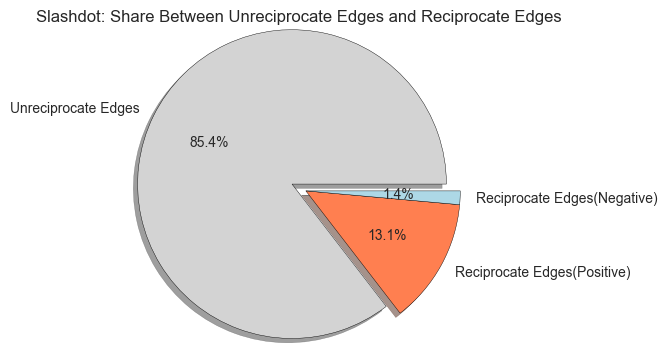

In [111]:
# Data to plot
labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [549202, 84380, 9164] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Slashdot: Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()

In [24]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [25]:
data=data[['node', 'reputation', 'normalized_reputation', 'posi_outdegree', 'posi_indegree','posi_eigenvalue','posi_between','posi_close','posi_cluster','neg_outdegree', 'neg_indegree','neg_eigenvalue', 'neg_between', 'neg_close','neg_cluster']]

In [28]:
data_noreci=data_unreci[['node', 'reputation', 'normalized_reputation','posi_outdegree', 'posi_indegree','posi_eigenvalue','posi_between','posi_close','posi_cluster','neg_outdegree', 'neg_indegree','neg_eigenvalue', 'neg_between', 'neg_close','neg_cluster']]

In [29]:
data.describe()

,node,reputation,normalized_reputation,posi_outdegree,posi_indegree,posi_eigenvalue,posi_between,posi_close,posi_cluster,neg_outdegree,neg_indegree,neg_eigenvalue,neg_between,neg_close,neg_cluster
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,3.663591,0.469742,5.174718,5.174718,0.000391,1.639090e-05,0.066103,0.054793,1.511127,1.511127,0.000725,0.000011,0.017169,0.003611
std,23713.074593,24.977701,0.664568,18.575064,27.333433,0.003467,1.715800e-04,0.080188,0.182795,9.944356,7.590762,0.003413,0.000161,0.046543,0.041132
min,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20535.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41071.500000,1.000000,0.959592,1.000000,1.000000,0.000006,0.000000e+00,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61607.250000,2.000000,1.000000,3.000000,3.000000,0.000065,2.007023e-07,0.153796,0.010870,0.000000,1.000000,0.000139,0.000000,0.000000,0.000000
max,82143.000000,2481.000000,1.000000,428.000000,2512.000000,0.151865,1.768646e-02,0.245518,1.000000,400.000000,498.000000,0.161218,0.016219,0.211460,1.000000


In [30]:
data_noreci.describe()

,node,reputation,normalized_reputation,posi_outdegree,posi_indegree,posi_eigenvalue,posi_between,posi_close,posi_cluster,neg_outdegree,neg_indegree,neg_eigenvalue,neg_between,neg_close,neg_cluster
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,2.747930,0.369540,4.147497,4.147497,6.359457e-04,1.639090e-05,0.032786,0.022867,1.399567,1.399567,0.000624,0.000011,0.008741,0.003030
std,23713.074593,23.336385,0.673785,14.852307,25.374678,3.430665e-03,1.715800e-04,0.048763,0.107830,9.401997,7.339415,0.003433,0.000161,0.026571,0.037172
min,0.000000,-388.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20535.750000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41071.500000,1.000000,0.500000,0.000000,1.000000,2.174767e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61607.250000,2.000000,1.000000,2.000000,2.000000,2.044059e-04,2.007023e-07,0.090599,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,82143.000000,2472.000000,1.000000,387.000000,2503.000000,2.516789e-01,1.768646e-02,0.174890,1.000000,400.000000,495.000000,0.203546,0.016219,0.143883,1.000000


Examples for the use are scores of the same set of student in different exams, or repeated sampling from the same units. The test measures whether the average score differs significantly across samples (e.g. exams). If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

## T test on the independence of the two reputations

In [31]:
#Calculates the T-test on TWO RELATED samples of scores, a and b.
#This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected)values.
scipy.stats.ttest_rel(data.reputation, data_noreci.reputation)

Ttest_relResult(statistic=42.947285040103971, pvalue=0.0)

In [32]:
scipy.stats.ttest_rel(data.normalized_reputation, data_noreci.normalized_reputation)

Ttest_relResult(statistic=87.739152537364916, pvalue=0.0)

In [33]:
#alculates the T-test for the means of two independent samples of scores.
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
scipy.stats.ttest_ind(data.reputation, data_noreci.reputation, equal_var=False) 


Ttest_indResult(statistic=7.6773806205470096, pvalue=1.6326811729171172e-14)

In [34]:
scipy.stats.ttest_ind(data.normalized_reputation, data_noreci.normalized_reputation, equal_var=False)

Ttest_indResult(statistic=30.345614341774965, pvalue=1.0413874781336944e-201)

## Reciprocity's influence on reputation 

In [35]:
data=pd.read_csv("slashdot_12property_0823.csv")
data_unreci=pd.read_csv("slashdot_noreci_12property_0825.csv")
all_reci=pd.read_csv("slash_reciprocity0902.csv")
posi_reci=pd.read_csv("slash_posi_reciprocity0902.csv")
neg_reci=pd.read_csv("slash_neg_reciprocity0902.csv")

In [36]:
data["new_norm_repu"]=(data['posi_indegree']-data['neg_indegree'])/(data['posi_indegree']+data['neg_indegree'])

In [37]:
data

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,new_norm_repu
0,0,0,24,199,5,29,1.672268e-02,0.019334,6.526473e-04,3.050995e-04,170,0.745614,0.023877,0.009470,0.187191,0.144540,0.745614
1,1,1,71,95,24,21,4.183285e-03,0.022558,6.209851e-04,2.305455e-04,74,0.637931,0.036660,0.015856,0.209969,0.155980,0.637931
2,2,2,0,20,0,0,3.572847e-04,0.000000,0.000000e+00,0.000000e+00,20,1.000000,0.026316,0.000000,0.000000,0.000000,1.000000
3,3,3,11,48,0,5,1.130339e-02,0.003093,7.213858e-05,0.000000e+00,43,0.811321,0.227813,0.000000,0.172787,0.000000,0.811321
4,4,4,1,109,0,15,4.614282e-03,0.010712,6.008081e-06,0.000000e+00,94,0.758065,0.015179,0.000000,0.000013,0.000000,0.758065
5,5,5,74,33,5,1,6.047047e-03,0.000003,2.498085e-04,2.863008e-07,32,0.941176,0.049104,0.000000,0.189189,0.137864,0.941176
6,6,6,17,8,0,0,3.556511e-04,0.000000,2.963236e-05,0.000000e+00,8,1.000000,0.069264,0.000000,0.173570,0.000000,1.000000
7,7,7,21,47,8,58,1.479759e-03,0.011577,7.067955e-05,1.253863e-04,-11,-0.104762,0.027040,0.002331,0.170376,0.121099,-0.104762
8,8,8,102,481,83,118,6.242891e-02,0.068030,9.142899e-03,3.712054e-03,363,0.606010,0.025627,0.005999,0.210169,0.183828,0.606010
9,9,9,38,151,1,9,2.118670e-02,0.006495,3.158515e-04,1.030513e-06,142,0.887500,0.079290,0.044444,0.175252,0.123726,0.887500


In [38]:
#choose nodes with norm_repu 
node_has_norm_repu=data[data['new_norm_repu'].notnull()]

In [39]:
node_has_norm_repu.to_csv('slashdot_regressiondata_0902.csv')

In [40]:
len(node_has_norm_repu),len(data) ##有12000多个node是没有norm rep的

(70284, 82144)

In [41]:
node_has_norm_repu['new_norm_repu'].describe()

count    70284.000000
mean         0.549008
std          0.687502
min         -1.000000
25%          0.272727
50%          1.000000
75%          1.000000
max          1.000000
Name: new_norm_repu, dtype: float64

In [42]:
node_has_norm_repu.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'new_norm_repu'],
      dtype='object')

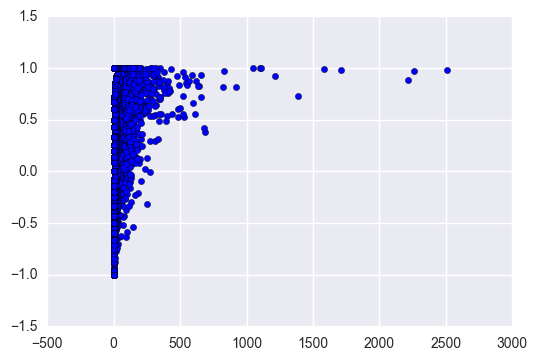

In [43]:
plt.scatter(node_has_norm_repu['posi_indegree'],node_has_norm_repu['normalized_reputation'])

In [44]:
node_has_norm_repu.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,new_norm_repu
count,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,7.028400e+04,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000
mean,36644.444383,36644.444383,5.583575,6.047920,1.705168,1.766120,4.568743e-04,0.000848,0.000019,0.000013,4.281800,0.549008,0.055100,0.004113,0.059509,0.018331,0.549008
std,21804.835235,21804.835235,19.988040,29.460289,10.722791,8.178778,3.744256e-03,0.003676,0.000185,0.000174,26.953977,0.687502,0.179745,0.043607,0.079891,0.048071,0.687502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,17854.750000,17854.750000,0.000000,1.000000,0.000000,0.000000,3.068884e-07,0.000000,0.000000,0.000000,1.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.272727
50%,36270.500000,36270.500000,0.000000,1.000000,0.000000,0.000000,1.347076e-05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,54498.500000,54498.500000,3.000000,4.000000,0.000000,1.000000,9.403137e-05,0.000259,0.000002,0.000000,3.000000,1.000000,0.014758,0.000000,0.152144,0.000000,1.000000
max,82142.000000,82142.000000,428.000000,2512.000000,400.000000,498.000000,1.518648e-01,0.161218,0.017686,0.016219,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460,1.000000


In [45]:
Counter(node_has_norm_repu['posi_indegree'])

Counter({0: 8390,
         1: 27445,
         2: 10334,
         3: 5420,
         4: 3412,
         5: 2398,
         6: 1756,
         7: 1391,
         8: 1082,
         9: 876,
         10: 718,
         11: 557,
         12: 507,
         13: 432,
         14: 386,
         15: 351,
         16: 296,
         17: 287,
         18: 251,
         19: 199,
         20: 206,
         21: 191,
         22: 147,
         23: 150,
         24: 134,
         25: 121,
         26: 128,
         27: 128,
         28: 113,
         29: 92,
         30: 87,
         31: 96,
         32: 80,
         33: 74,
         34: 80,
         35: 66,
         36: 64,
         37: 59,
         38: 50,
         39: 44,
         40: 55,
         41: 41,
         42: 41,
         43: 45,
         44: 34,
         45: 31,
         46: 37,
         47: 46,
         48: 42,
         49: 27,
         50: 29,
         51: 34,
         52: 26,
         53: 34,
         54: 30,
         55: 26,
         56: 29,
 

In [46]:
Counter(node_has_norm_repu['neg_indegree'])

Counter({0: 40987,
         1: 15094,
         2: 4920,
         3: 2482,
         4: 1482,
         5: 974,
         6: 723,
         7: 548,
         8: 408,
         9: 301,
         10: 284,
         11: 206,
         12: 153,
         13: 159,
         14: 116,
         15: 123,
         16: 111,
         17: 67,
         18: 59,
         19: 55,
         20: 63,
         21: 65,
         22: 53,
         23: 52,
         24: 35,
         25: 38,
         26: 35,
         27: 35,
         28: 31,
         29: 32,
         30: 25,
         31: 26,
         32: 17,
         33: 19,
         34: 26,
         35: 14,
         36: 22,
         37: 13,
         38: 10,
         39: 21,
         40: 7,
         41: 19,
         42: 11,
         43: 12,
         44: 12,
         45: 6,
         46: 15,
         47: 15,
         48: 11,
         49: 15,
         50: 11,
         51: 7,
         52: 10,
         53: 9,
         54: 12,
         55: 9,
         56: 5,
         57: 7,
       

In [47]:
# choose the nodes with 1 norm_repu 
node_one_repu=node_has_norm_repu[node_has_norm_repu['normalized_reputation']==1] #40987

In [48]:
node_one_repu_one_posi_indegree=node_one_repu[node_has_norm_repu['posi_indegree']==1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [49]:
len(node_one_repu),len(node_one_repu_one_posi_indegree)

(40987, 23220)

In [50]:
node_one_repu_notone_posi_indegree=node_one_repu[node_has_norm_repu['posi_indegree']!=1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [53]:
len(node_one_repu_notone_posi_indegree)

17767

In [54]:
zz=node_has_norm_repu[(node_has_norm_repu['posi_indegree']<=100) & (node_has_norm_repu['normalized_reputation']!=1)]
                          

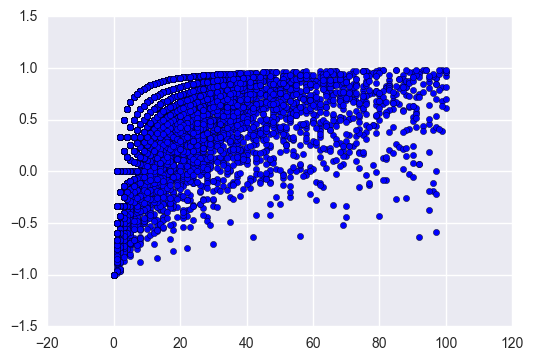

In [55]:
plt.scatter(zz['posi_indegree'], zz['normalized_reputation'])

In [56]:
# choose the nodes with minus 1 and 1 norm_repu and either the the posi_indegree or neg_indegree is not 0
node_minusone_repu=node_has_norm_repu[node_has_norm_repu['normalized_reputation']==-1] #8390,

In [57]:
node_minusone_repu_one_neg_indegree= node_minusone_repu[node_has_norm_repu['neg_indegree']==1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [58]:
len(node_minusone_repu),len(node_minusone_repu_one_neg_indegree)

(8390, 6605)

(array([  8.39100000e+03,   6.00000000e+00,   7.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.10000000e+01,
          5.00000000e+00,   6.00000000e+00,   1.30000000e+01,
          1.20000000e+01,   2.30000000e+01,   1.50000000e+01,
          3.80000000e+01,   1.30000000e+01,   5.00000000e+01,
          1.60000000e+01,   8.70000000e+01,   6.00000000e+00,
          2.20000000e+01,   3.00000000e+00,   1.64000000e+02,
          1.10000000e+01,   3.80000000e+01,   1.90000000e+01,
          7.00000000e+00,   3.59000000e+02,   2.40000000e+01,
          4.20000000e+01,   8.10000000e+01,   1.30000000e+01,
          5.00000000e+01,   2.60000000e+01,   1.30000000e+01,
          1.01400000e+03,   1.70000000e+01,   2.50000000e+01,
          5.40000000e+01,   8.30000000e+01,   4.00000000e+01,
          3.35000000e+02,   1.40000000e+01,   5.40000000e+01,
          1.80000000e+02,   3.50000000e+01,   1.17000000e+02,
          7.10000000e+01,   6.80000000e+01,   4.40000000e+01,
        

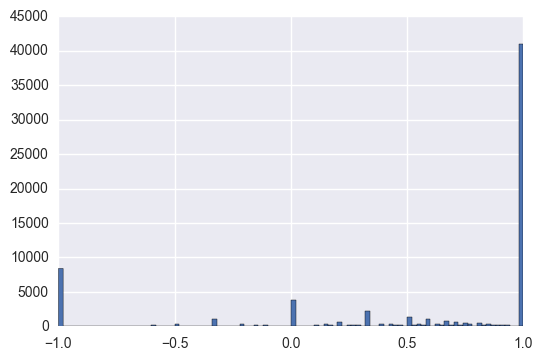

In [59]:
plt.hist(node_has_norm_repu['new_norm_repu'],bins=100)

In [60]:
z=node_has_norm_repu.copy()

In [61]:
len(data), len(data_unreci),len(all_reci),len(posi_reci), len(neg_reci)

(82144, 82144, 22093, 20933, 3682)

In [62]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'new_norm_repu'],
      dtype='object')

## build the dataframe to analyse reciprocity and norm_repu
## exclude the nodes which don't have norm_repu
## by using the new csv.

In [63]:
node_has_norm_repu.to_csv('slashdot_regressiondata_0902.csv')

In [66]:
needlist=['node','reputation','normalized_reputation']
node_two_repu = pd.merge(node_has_norm_repu[needlist],data_unreci[needlist],on='node', how='left')

In [67]:
len(node_two_repu)

70284

In [68]:
node_two_repu

,node,reputation_x,normalized_reputation_x,reputation_y,normalized_reputation_y
0,0,170,0.745614,159,0.739535
1,1,74,0.637931,51,0.560440
2,2,20,1.000000,20,1.000000
3,3,43,0.811321,38,0.791667
4,4,94,0.758065,94,0.758065
5,5,32,0.941176,29,0.935484
6,6,8,1.000000,5,1.000000
7,7,-11,-0.104762,-13,-0.126214
8,8,363,0.606010,313,0.607767
9,9,142,0.887500,123,0.872340


In [69]:
node_two_repu.columns=['node', 'reci_repu','reci_norm_repu','unreci_repu','unreci_norm_repu']

In [70]:
node_two_repu.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu
0,0,170,0.745614,159,0.739535
1,1,74,0.637931,51,0.560440
2,2,20,1.000000,20,1.000000
3,3,43,0.811321,38,0.791667
4,4,94,0.758065,94,0.758065


In [71]:
all_reci

,Unnamed: 0,Reciprocity,node
0,0,13,0
1,1,25,1
2,2,5,3
3,3,3,5
4,4,3,6
5,5,2,7
6,6,84,8
7,7,19,9
8,8,8,10
9,9,85,11


## build the reciprocity df

In [72]:
test1=pd.merge(node_two_repu,all_reci[['node','Reciprocity']],on='node', how='left')

In [73]:
test1.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity
0,0,170,0.745614,159,0.739535,13.0
1,1,74,0.637931,51,0.560440,25.0
2,2,20,1.000000,20,1.000000,NaN
3,3,43,0.811321,38,0.791667,5.0
4,4,94,0.758065,94,0.758065,NaN


In [74]:
len(test1)

70284

In [75]:
bneedlist=['node','Reciprocity']
testdf2=pd.merge(all_reci[bneedlist],posi_reci[bneedlist],on='node', how='left')

In [76]:
len(testdf2)

22093

In [77]:
testdf3=pd.merge(testdf2,neg_reci[bneedlist],on='node', how='left')

In [78]:
testdf3.columns=['node','all_reci','posi_reci','neg_reci']

In [79]:
len(testdf3)

22093

In [80]:
repu_reci=pd.merge(test1, testdf3, on='node', how='left')

In [81]:
repu_reci.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci
0,0,170,0.745614,159,0.739535,13.0,13.0,12.0,1.0
1,1,74,0.637931,51,0.560440,25.0,25.0,24.0,1.0
2,2,20,1.000000,20,1.000000,NaN,NaN,NaN,NaN
3,3,43,0.811321,38,0.791667,5.0,5.0,5.0,NaN
4,4,94,0.758065,94,0.758065,NaN,NaN,NaN,NaN


In [82]:
##注意！！ 将na换成0 会影响整个distribution，在分析reciprocity distri的时候一定要用原始数据， 而不是这个
#repu_reci=repu_reci.fillna(value=0)

In [83]:
repu_reci.columns

Index(['node', 'reci_repu', 'reci_norm_repu', 'unreci_repu',
       'unreci_norm_repu', 'Reciprocity', 'all_reci', 'posi_reci', 'neg_reci'],
      dtype='object')

In [84]:
len(repu_reci)

70284

In [85]:
repu_reci['repu_diff']=repu_reci['reci_repu']-repu_reci['unreci_repu']
repu_reci['norm_repu_diff']=repu_reci['reci_norm_repu']-repu_reci['unreci_norm_repu']
repu_reci['posi_neg_reci_diff']=repu_reci['posi_reci']-repu_reci['neg_reci']

In [86]:
len(repu_reci)

70284

In [87]:
repu_reci.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci,repu_diff,norm_repu_diff,posi_neg_reci_diff
0,0,170,0.745614,159,0.739535,13.0,13.0,12.0,1.0,11,0.006079,11.0
1,1,74,0.637931,51,0.560440,25.0,25.0,24.0,1.0,23,0.077491,23.0
2,2,20,1.000000,20,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
3,3,43,0.811321,38,0.791667,5.0,5.0,5.0,NaN,5,0.019654,NaN
4,4,94,0.758065,94,0.758065,NaN,NaN,NaN,NaN,0,0.000000,NaN


In [88]:
repu_reci.columns

Index(['node', 'reci_repu', 'reci_norm_repu', 'unreci_repu',
       'unreci_norm_repu', 'Reciprocity', 'all_reci', 'posi_reci', 'neg_reci',
       'repu_diff', 'norm_repu_diff', 'posi_neg_reci_diff'],
      dtype='object')

In [89]:
repu_reci.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci,repu_diff,norm_repu_diff,posi_neg_reci_diff
count,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,22093.000000,22093.000000,20933.000000,3682.000000,70284.000000,70284.000000,2522.000000
mean,36644.444383,4.281800,0.549008,3.211627,0.431898,4.234101,4.234101,4.030956,2.488865,1.070172,0.117110,5.909199
std,21804.835235,26.953977,0.687502,25.199101,0.709691,12.060445,12.060445,11.872121,4.021136,6.593597,0.351048,16.434503
min,0.000000,-350.000000,-1.000000,-388.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-65.000000,-1.714286,-65.000000
25%,17854.750000,1.000000,0.272727,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,36270.500000,1.000000,1.000000,1.000000,0.983122,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,54498.500000,3.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
max,82142.000000,2481.000000,1.000000,2472.000000,1.000000,362.000000,362.000000,362.000000,66.000000,362.000000,1.941176,203.000000


In [113]:
repu_reci.to_csv('slash_repu_reci0902')

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

np.random.seed(0)
x = np.random.uniform(0.0,10.0,15)
y = np.random.uniform(0.0,10.0,15)

datafile = cbook.get_sample_data('/Users/zhangqian/Desktop/111Dissertation/figuresonline/signed and directed graph.png')
img = imread(datafile)
plt.scatter(x,y,zorder=1)
plt.hist(posi_reci['Reciprocity'],bins=500)
#plt.xlim(0,50)
#Use the extent keyword of imshow. The order of the argument is [left, right, bottom, top]
#extent : scalars (left, right, bottom, top), optional, default: None
#The location, in data-coordinates, of the lower-left and upper-right corners. If None, the image is positioned such that the pixel centers fall on zero-based (row, column) indices.


plt.imshow(img,extent=[0,10000,0,12000]) #, zorder=0,
 
plt.show()

In [92]:
len(repu_reci['Reciprocity'].dropna())

22093

(array([  2.23800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.60000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.99000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.60000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   7.60000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.80000000e+01,   0.00000000e+00,
        

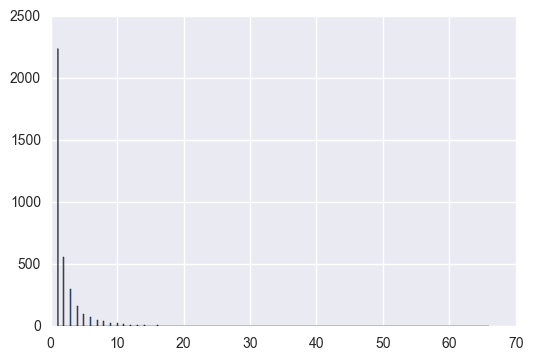

In [93]:
plt.hist(repu_reci['neg_reci'].dropna(),bins=500)
#plt.xlim(0,50)

(array([ 2238.,   560.,   299.,   260.,   164.,    80.,    42.,    24.,
            8.,     7.]),
 array([ 0.        ,  0.18195439,  0.36390879,  0.54586318,  0.72781757,
         0.90977197,  1.09172636,  1.27368075,  1.45563515,  1.63758954,
         1.81954394]),
 <a list of 10 Patch objects>)

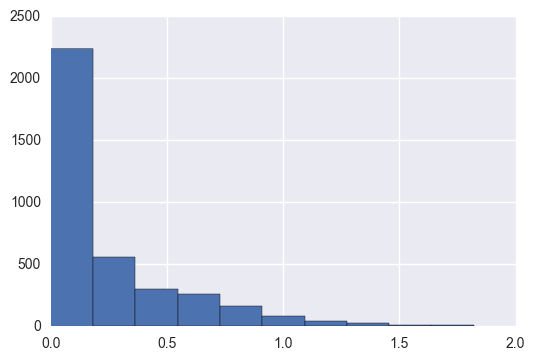

In [94]:
plt.hist(np.log10(repu_reci['neg_reci'].dropna()))

In [95]:
all_reci_dic=Counter(repu_reci['Reciprocity'].dropna())
posi_reci_dic=Counter(repu_reci['posi_reci'].dropna())
neg_reci_dic=Counter(repu_reci['neg_reci'].dropna())

In [96]:
import powerlaw

In [99]:
powerlaw.Fit(list(neg_reci_dic.values())).power_law.alpha

Calculating best minimal value for power law fit


1.533623755893905

[None, None, None, None, None, None, None, None]

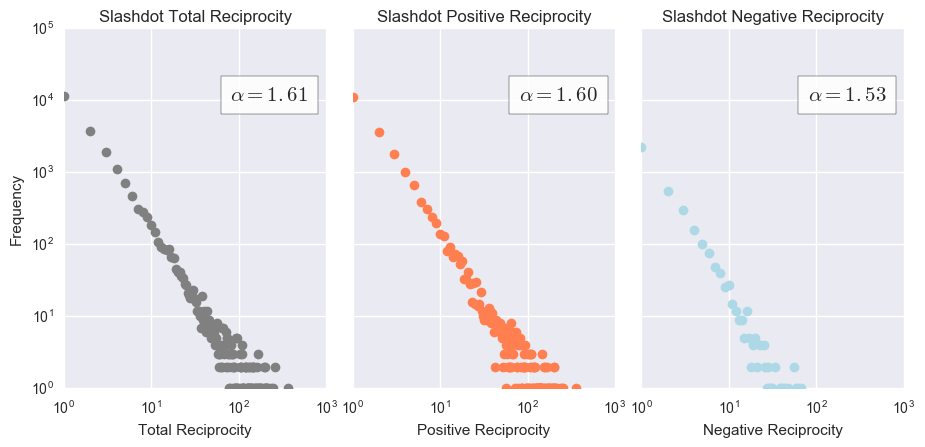

In [102]:
import pylab
plt.figure(1)
#ax1.text(100, 100000, r'$\alpha=1.55$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})


# all reci
ax1=plt.subplot(131)
ax1.loglog(list(all_reci_dic.keys()),list(all_reci_dic.values()),'grey',marker='o',linestyle='None')
ax1.set_title("Slashdot Total Reciprocity")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Total Reciprocity")
ax1.text(80, 10000, r'$\alpha=1.61$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax1.grid(True)

#posi reci
ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
ax2.loglog(list(posi_reci_dic.keys()),list(posi_reci_dic.values()),'coral',marker='o',linestyle='None')
ax2.set_title("Slashdot Positive Reciprocity")
ax2.set_xlabel("Positive Reciprocity")
ax2.set_ylim([0, 10000])
ax2.text(80, 10000, r'$\alpha=1.60$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax2.grid(True)

#neg_reci
ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
ax3.loglog(list(neg_reci_dic.keys()),list(neg_reci_dic.values()),'lightblue',marker='o',linestyle='None')
ax3.set_title("Slashdot Negative Reciprocity")
ax3.set_xlabel("Negative Reciprocity")

ax3.text(80, 10000, r'$\alpha=1.53$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax3.grid(True)


plt.subplots_adjust(top=1, bottom=.1, left=0.1, right=1.5, hspace=1,wspace=.1)

pylab.setp(ax2.get_yticklabels(), visible=False)
pylab.setp(ax3.get_yticklabels(), visible=False)


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x11f7a3c50>],
 'caps': [<matplotlib.lines.Line2D at 0x12222f208>,
 'fliers': [<matplotlib.lines.Line2D at 0x122234ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x122226198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f7a3e10>,
  <matplotlib.lines.Line2D at 0x11f7a32e8>]}

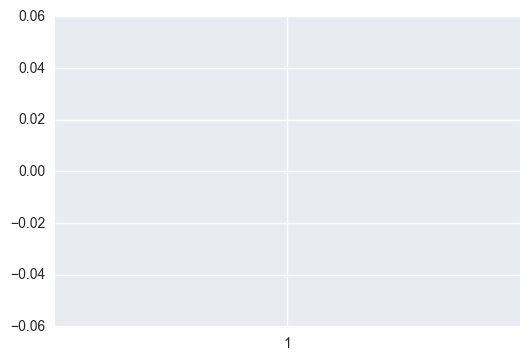

In [103]:
plt.boxplot(repu_reci['Reciprocity'])
##因为低端数据很集中，所以boxplot看不到效果

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

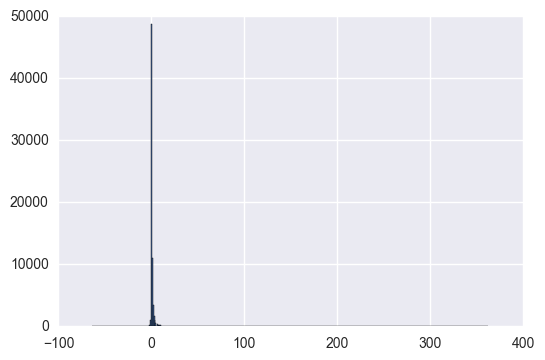

In [104]:
plt.hist(repu_reci['repu_diff'],bins=500)

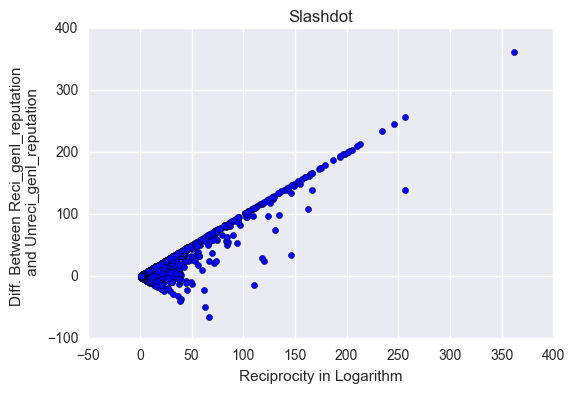

In [158]:
plt.scatter(repu_reci["all_reci"].values,repu_reci['repu_diff'].values)
#plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_genl_reputation \n and Unreci_genl_reputation")
plt.title('Slashdot')

In [172]:
# load statsmodels as alias ``sm``
import statsmodels.api as sm

In [179]:
#repu_reci["all_reci"] has nan value so can't operate linear regression
#replace nan with zero
nonan_all_reci=repu_reci["all_reci"].fillna(value=0)

In [182]:
nonan_all_reci

0        13.0
1        25.0
2         0.0
3         5.0
4         0.0
5         3.0
6         3.0
7         2.0
8        84.0
9        19.0
10        8.0
11       85.0
12        0.0
13        1.0
14       19.0
15        1.0
16       21.0
17       19.0
18        3.0
19        6.0
20        0.0
21       29.0
22        1.0
23        0.0
24        2.0
25        8.0
26        2.0
27        0.0
28        0.0
29       16.0
         ... 
70254     1.0
70255     0.0
70256     0.0
70257     1.0
70258     1.0
70259     0.0
70260     0.0
70261     0.0
70262     0.0
70263     1.0
70264     1.0
70265     0.0
70266     1.0
70267     1.0
70268     0.0
70269     1.0
70270     0.0
70271     0.0
70272     0.0
70273     0.0
70274     0.0
70275     0.0
70276     0.0
70277     0.0
70278     0.0
70279     0.0
70280     0.0
70281     0.0
70282     0.0
70283     0.0
Name: all_reci, dtype: float64

In [180]:
len(nonan_all_reci)

70284

In [176]:
len(list(repu_reci['repu_diff'].values))

70284

In [187]:
est = sm.OLS(repu_reci['repu_diff'].values, nonan_all_reci)

In [188]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 7.039e+05
Date:                Mon, 04 Sep 2017   Prob (F-statistic):               0.00
Time:                        18:21:32   Log-Likelihood:            -1.4889e+05
No. Observations:               70284   AIC:                         2.978e+05
Df Residuals:                   70283   BIC:                         2.978e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
all_reci       0.8888      0.001    839.017      0.000         0.887     0.891
==============================================================================
Omnibus:                   158304.944   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2226141212.604
Skew:                         -21.085   Prob(JB):                         0.00
Kurtosis:                     873.854   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
from scipy import stats
import numpy as np
test_lr = stats.linregress(list(nonan_all_reci), list(repu_reci['repu_diff'].values))



In [185]:
test_lr

LinregressResult(slope=0.89183590942436075, intercept=-0.11681034533026557, rvalue=0.95243580548035245, pvalue=0.0, stderr=0.0010763552675965777)

In [186]:
print ("r-squared:" rvalue**2)


SyntaxError: invalid syntax (<ipython-input-186-13ef36360bb0>, line 1)

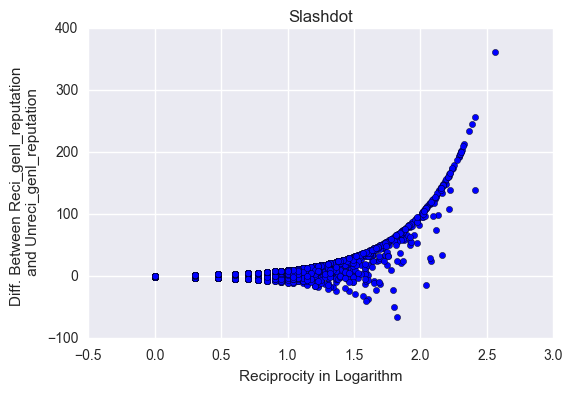

In [109]:
plt.scatter(np.log10(repu_reci["all_reci"].values),repu_reci['repu_diff'].values)
plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_genl_reputation \n and Unreci_genl_reputation")
plt.title('Slashdot')

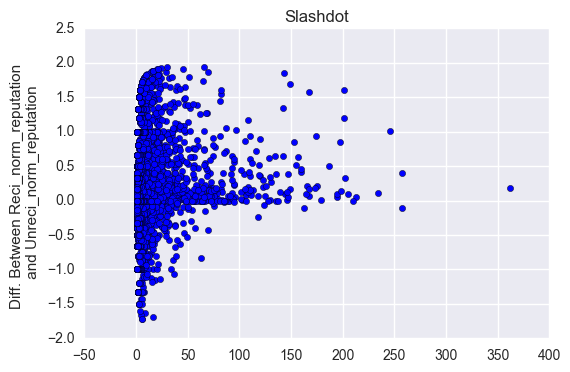

In [189]:
plt.scatter(repu_reci["all_reci"].values,repu_reci['norm_repu_diff'].values)
#plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_norm_reputation \n and Unreci_norm_reputation")
plt.title('Slashdot')

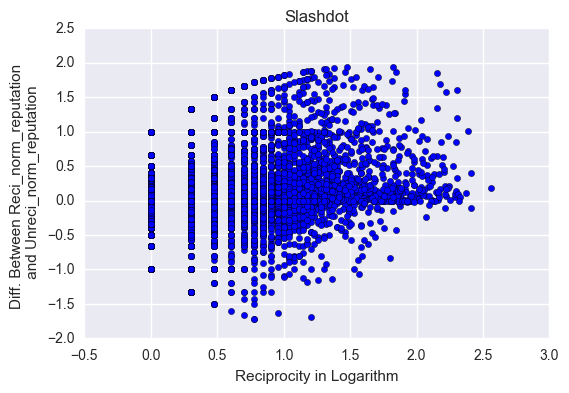

In [110]:
plt.scatter(np.log10(repu_reci["all_reci"].values),repu_reci['norm_repu_diff'].values)
plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_norm_reputation \n and Unreci_norm_reputation")
plt.title('Slashdot')

In [120]:
slash_repu_reci=pd.read_csv('slash_repu_reci0902')

In [121]:
epinion_repu_reci=pd.read_csv('epinion_repu_reci0902')

In [122]:
wiki_repu_reci=pd.read_csv('wiki_repu_reci0902')

[None, None, None, None, None, None, None]

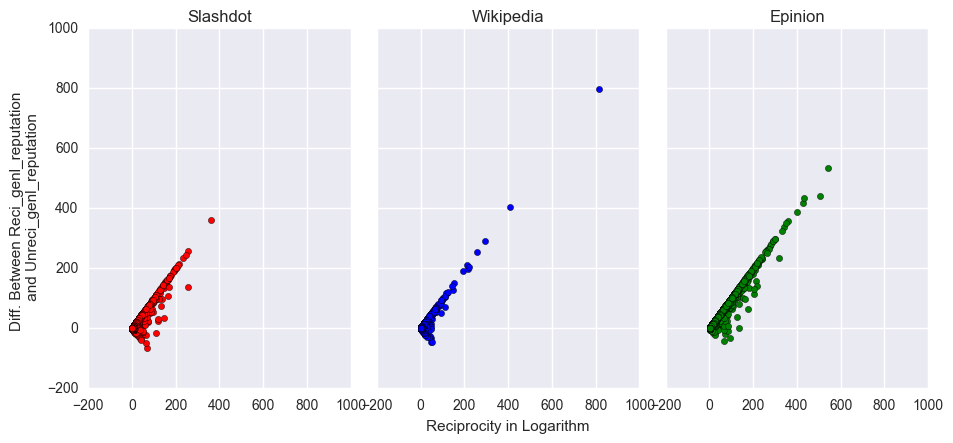

In [190]:
plt.figure(1)

# slash
ax1=plt.subplot(131)
ax1.scatter(slash_repu_reci["all_reci"].values,slash_repu_reci['repu_diff'].values,c='r',marker='o')
ax1.set_title("Slashdot")
ax1.set_ylabel("Diff. Between Reci_genl_reputation \n and Unreci_genl_reputation")
#ax1.set_ylabel("Frequency")
#ax1.text(100, 100000, r'$\alpha=1.55$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax1.grid(True)



#wiki
ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
ax2.scatter(wiki_repu_reci["all_reci"].values,wiki_repu_reci['repu_diff'].values,c='b',marker='o')
ax2.set_title("Wikipedia")
ax2.set_xlabel('Reciprocity in Logarithm')
#ax2.title('Wikipedia')
#ax2.set_ylim([0, 10000])
#ax2.text(100, 100000, r'$\alpha=1.92$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax2.grid(True)




#epinion
ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
ax3.scatter(epinion_repu_reci["all_reci"].values,epinion_repu_reci['repu_diff'].values,c='g',marker='o')
ax3.set_title("Epinion")
#ax3.text(100, 100000, r'$\alpha=1.64$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax3.grid(True)
plt.subplots_adjust(top=1, bottom=.1, left=0.1, right=1.5, hspace=1,wspace=.1)

pylab.setp(ax2.get_yticklabels(), visible=False)
pylab.setp(ax3.get_yticklabels(), visible=False)



[None, None, None, None, None, None, None, None, None, None]

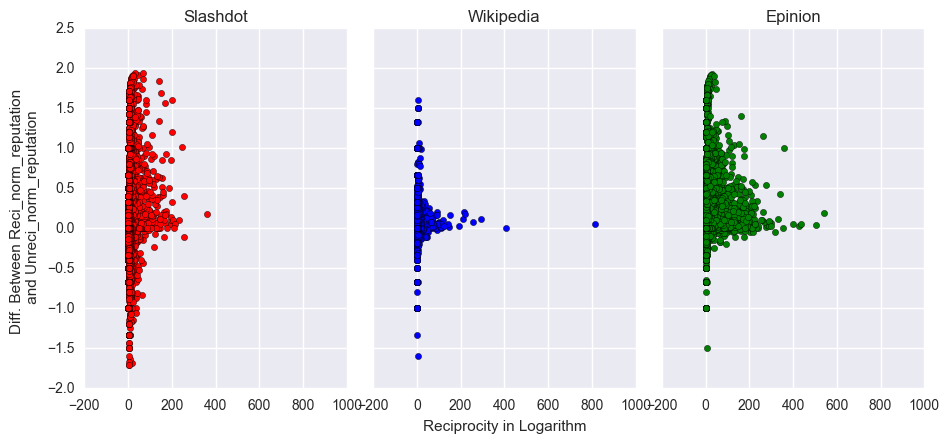

In [191]:
plt.figure(1)

# slash
ax1=plt.subplot(131)
ax1.scatter(slash_repu_reci["all_reci"].values,slash_repu_reci['norm_repu_diff'].values,c='r',marker='o')
ax1.set_title("Slashdot")
ax1.set_ylabel("Diff. Between Reci_norm_reputation \n and Unreci_norm_reputation")
#ax1.set_ylabel("Frequency")
#ax1.text(100, 100000, r'$\alpha=1.55$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax1.grid(True)


#wiki
ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
ax2.scatter(wiki_repu_reci["all_reci"].values,wiki_repu_reci['norm_repu_diff'].values,c='b',marker='o')
ax2.set_title("Wikipedia")
ax2.set_xlabel('Reciprocity in Logarithm')
#ax2.title('Wikipedia')
#ax2.set_ylim([0, 10000])
#ax2.text(100, 100000, r'$\alpha=1.92$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax2.grid(True)




#epinion
ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
ax3.scatter(epinion_repu_reci["all_reci"].values,epinion_repu_reci['norm_repu_diff'].values,c='g',marker='o')
ax3.set_title("Epinion")
#ax3.text(100, 100000, r'$\alpha=1.64$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax3.grid(True)
plt.subplots_adjust(top=1, bottom=.1, left=0.1, right=1.5, hspace=1,wspace=.1)

pylab.setp(ax2.get_yticklabels(), visible=False)
pylab.setp(ax3.get_yticklabels(), visible=False)



In [ ]:
labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [549202, 84380, 9164] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Slashdot: Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()

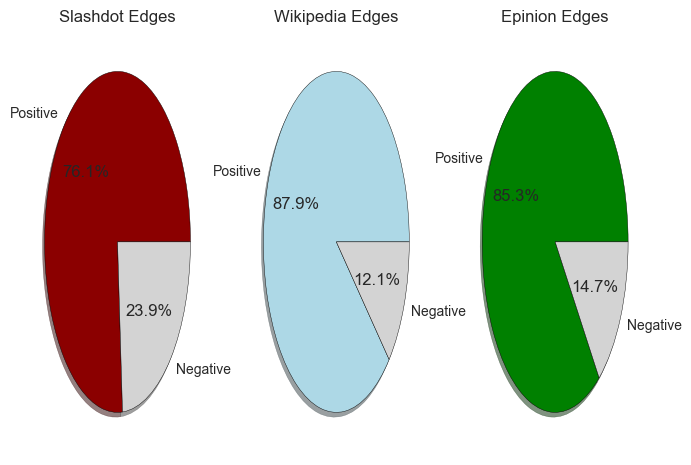

In [3]:
plt.figure(1)
ax1=plt.subplot(131)
ax1.pie([392179,123218],autopct='%1.1f%%', startangle=0,labels = ['Positive','Negative'],colors = ['darkred', 'lightgrey'], shadow=True)
ax1.set_title('Slashdot Edges')

ax1=plt.subplot(132)
ax1.pie([650653,89744],autopct='%1.1f%%', startangle=0,labels =['Positive', 'Negative'],colors = ['lightblue', 'lightgrey'], shadow=True)
ax1.set_title('Wikipedia Edges')

ax1=plt.subplot(133)
ax1.pie([717667,123705],autopct='%1.1f%%', startangle=0,labels =['Positive','Negative'],colors = ['green', 'lightgrey'], shadow=True)
ax1.set_title('Epinion Edges')

In [ ]:


sizes = [254345, 249614, 4731] #epinion


sizes = [41645, 38005, 3640] #wiki

sizes = [549202, 84380, 9164] #slash


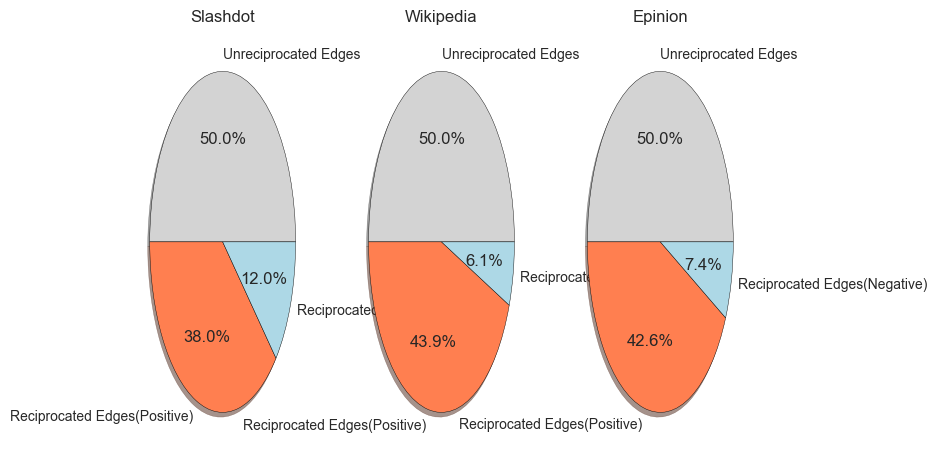

In [7]:
plt.figure(1)

labels = ['Unreciprocated Edges','Reciprocated Edges(Positive)','Reciprocated Edges(Negative)']
colors = ['lightgrey','coral','lightblue']

ax1=plt.subplot(131)
ax1.pie([515397,392179,123218],autopct='%1.1f%%', startangle=0,labels = labels,colors = colors, shadow=True)
ax1.set_title('Slashdot')

ax1=plt.subplot(132)
ax1.pie([740397,650653,89744],autopct='%1.1f%%', startangle=0,labels = labels,colors = colors, shadow=True)
ax1.set_title('Wikipedia')

ax1=plt.subplot(133)
ax1.pie([841372,717667,123705],autopct='%1.1f%%', startangle=0,labels = labels,colors = colors, shadow=True)
ax1.set_title('Epinion')

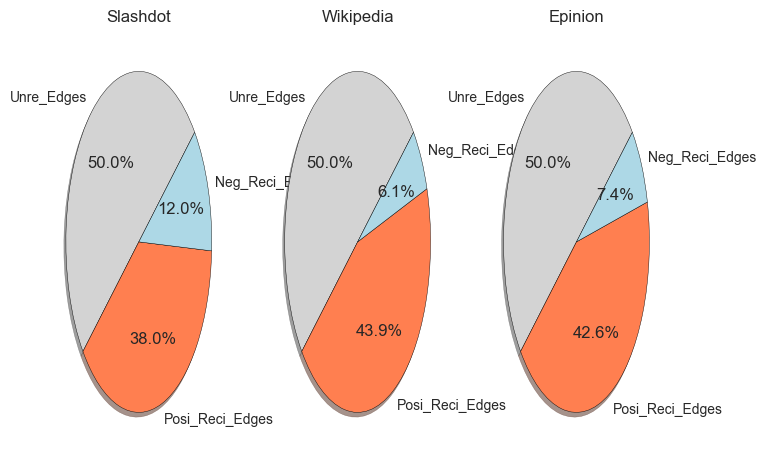

In [12]:
plt.figure(1)

labels = ['Unre_Edges','Posi_Reci_Edges','Neg_Reci_Edges']
colors = ['lightgrey','coral','lightblue']

ax1=plt.subplot(131)
ax1.pie([515397,392179,123218],autopct='%1.1f%%', startangle=40,labels = labels,colors = colors, shadow=True)
ax1.set_title('Slashdot')

ax1=plt.subplot(132)
ax1.pie([740397,650653,89744],autopct='%1.1f%%', startangle=40,labels = labels,colors = colors, shadow=True)
ax1.set_title('Wikipedia')

ax1=plt.subplot(133)
ax1.pie([841372,717667,123705],autopct='%1.1f%%', startangle=40,labels = labels,colors = colors, shadow=True)
ax1.set_title('Epinion')

[None, None, None, None, None, None, None, None, None, None]

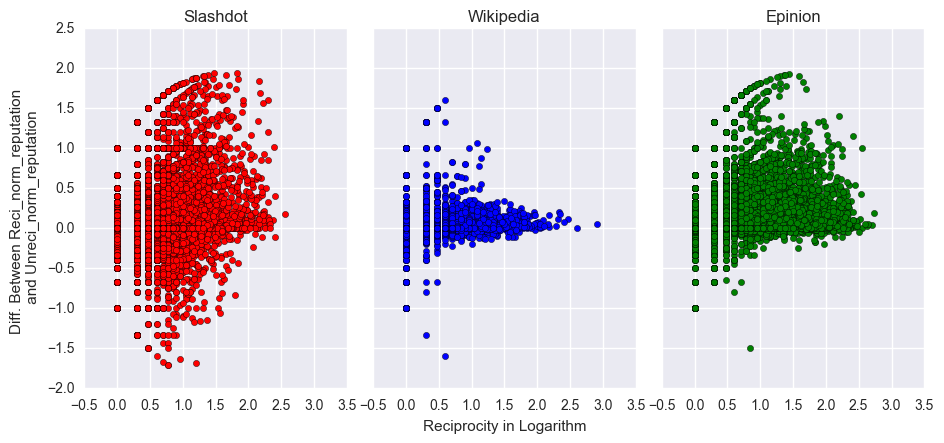

In [136]:
plt.figure(1)

# slash
ax1=plt.subplot(131)
ax1.scatter(np.log10(slash_repu_reci["all_reci"].values),slash_repu_reci['norm_repu_diff'].values,c='r',marker='o')
ax1.set_title("Slashdot")
ax1.set_ylabel("Diff. Between Reci_norm_reputation \n and Unreci_norm_reputation")
#ax1.set_ylabel("Frequency")
#ax1.text(100, 100000, r'$\alpha=1.55$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax1.grid(True)


#wiki
ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
ax2.scatter(np.log10(wiki_repu_reci["all_reci"].values),wiki_repu_reci['norm_repu_diff'].values,c='b',marker='o')
ax2.set_title("Wikipedia")
ax2.set_xlabel('Reciprocity in Logarithm')
#ax2.title('Wikipedia')
#ax2.set_ylim([0, 10000])
#ax2.text(100, 100000, r'$\alpha=1.92$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax2.grid(True)




#epinion
ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
ax3.scatter(np.log10(epinion_repu_reci["all_reci"].values),epinion_repu_reci['norm_repu_diff'].values,c='g',marker='o')
ax3.set_title("Epinion")
#ax3.text(100, 100000, r'$\alpha=1.64$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax3.grid(True)
plt.subplots_adjust(top=1, bottom=.1, left=0.1, right=1.5, hspace=1,wspace=.1)

pylab.setp(ax2.get_yticklabels(), visible=False)
pylab.setp(ax3.get_yticklabels(), visible=False)

